In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model
import seaborn as sns

In [31]:
# Using in-built skLearn datasets for Diabetes
diabetes=datasets.load_diabetes()
# below will tell what the datasets contains
print(diabetes.keys())
print(diabetes.feature_names)
# DESCR gives decription of dataset
print(diabetes.DESCR)
print(diabetes.data)

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density li

In [34]:
# Below is way to convert a sklearn dataset into panda dataframe
diabetes_df=pd.DataFrame(data=diabetes.data,
                         columns=diabetes.feature_names)
diabetes_df['target']=diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


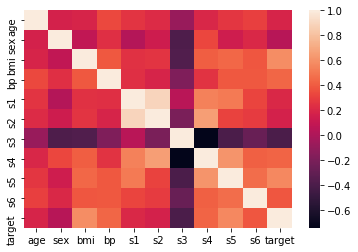

In [35]:
# drawing the heatmap to see correlation of diabetes with factors
sns.heatmap(diabetes_df.corr())

# Training with single Feature

In [112]:
# np.newxis is used to increase the dimension of array
# 1D to 2D , 2D to 3D and so on ...
diabetes_X=diabetes.data[:,np.newaxis,2]
print(diabetes_X)
# Below is another way to extract data
# diabetes_X=diabetes_df.iloc[: ,2]
# print(diabetes_X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [113]:
# Taking all but last 30 datasets to train the model
diabetes_X_train=diabetes_X[:-30]
print(diabetes_X_train.shape)
diabetes_X_test=diabetes_X[-30:]
print(diabetes_X_test.shape)

(412, 1)
(30, 1)


In [114]:
diabetes_y_train=diabetes.target[:-30]
diabetes_y_test=diabetes.target[-30:]

In [115]:
model=linear_model.LinearRegression()
model.fit(diabetes_X_train,diabetes_y_train)

LinearRegression()

In [116]:
# Now we are gonna test this model we built
diabetes_y_predict=model.predict(diabetes_X_test)

In [117]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error is ",mean_squared_error(diabetes_y_test,
                                           diabetes_y_predict))

print("The score of the model is ",r2_score(diabetes_y_test,
                                            diabetes_y_predict))

Mean squared error is  3035.0601152912686
The score of the model is  0.41092072813583513


Weights [941.43097333]
Intercept 153.39713623331698


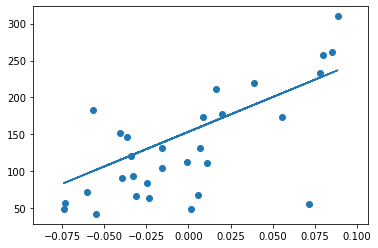

In [118]:
print("Weights",model.coef_)
print("Intercept",model.intercept_)
plt.scatter(diabetes_X_test,diabetes_y_test)
plt.plot(diabetes_X_test,diabetes_y_predict,)
plt.show()

# Training with multiple Features


In [119]:
diabetes_X=diabetes.data
diabetes_X_train=diabetes_X[:-30]
print(diabetes_X_train.shape)
diabetes_X_test=diabetes_X[-30:]
print(diabetes_X_test.shape)

(412, 10)
(30, 10)


In [120]:
diabetes_y_train=diabetes.target[:-30]
diabetes_y_test=diabetes.target[-30:]

In [121]:
model=linear_model.LinearRegression()
model.fit(diabetes_X_train,diabetes_y_train)

LinearRegression()

In [122]:
diabetes_y_predict=model.predict(diabetes_X_test)
print("Mean squared error is ",mean_squared_error(diabetes_y_test,
                                           diabetes_y_predict))

print("The score of the model is ",r2_score(diabetes_y_test,
                                            diabetes_y_predict))

Mean squared error is  1826.5364191345427
The score of the model is  0.645484865885796
